This is a more realistic scenario.

Use the Rosenbrock solver to solve 
$$
\dfrac{\partial}{\partial t} c(t) = -i \hat{H} \ c(t) \;,
$$
where $\hat H$ is a two dimentional (time-dependent) Hamiltonian, and $c(t)$ the amplitudes corresponding to
$|{1}\rangle$ and $|{2}\rangle$ (in the basis where you've defined $\hat H$).


In this particular example (see ```TwoState.cpp``` to see how it is implemented) we use 
$$
    \hat H =  
    \Bigg( 
        \begin{matrix} 5 & 0.5 \ e^{-5(t-t_{\rm max}/2)^2} \\ 0.5 \ e^{-5(t-t_{\rm max}/2)^2} & 3\end{matrix} 
    \Bigg) \;,
$$

with $t_{\rm max}$ the upper integration limit you choose below. For initial condition we choose 
$|{\psi_0}\rangle = \dfrac{1}{\sqrt{2}} \left(|{1}\rangle - i \|{2}\rangle \right)$.

In [1]:
import subprocess
import sys

import os

import time

In [2]:
import numpy as np

import matplotlib
#matplotlib.use('WebAgg')
#matplotlib.use('Qt4Cairo')
#matplotlib.use('Qt5Cairo')
matplotlib.use('nbAgg')
import matplotlib.pyplot as plt

plt.rcParams['font.family']='serif'
plt.rcParams['font.size']=10
plt.rcParams['mathtext.fontset']='stixsans'

In [3]:

os.system(r'make')


0

In [4]:
tmax=10

time0=time.time()
output=subprocess.check_output(["./TwoState.run",str(tmax)]).decode(sys.stdout.encoding).split("\n")

print("time: {:10} s".format( time.time()-time0)  )




solution=np.array([ (i.split(' '))[:-1]   for i in output[:-1] ] ,np.float64)


time: 0.055504798889160156 s


In [5]:
t=solution[:,0]
P1=solution[:,1]
P2=solution[:,2]
Energy=solution[:,3]
Energy_imag=solution[:,4]#this should be zero




c1_re=solution[:,5]
c1_im=solution[:,6]
c2_re=solution[:,7]
c2_im=solution[:,8]

err1_re=solution[:,9]
err1_im=solution[:,10]
err2_re=solution[:,11]
err2_im=solution[:,12]


<IPython.core.display.Javascript object>


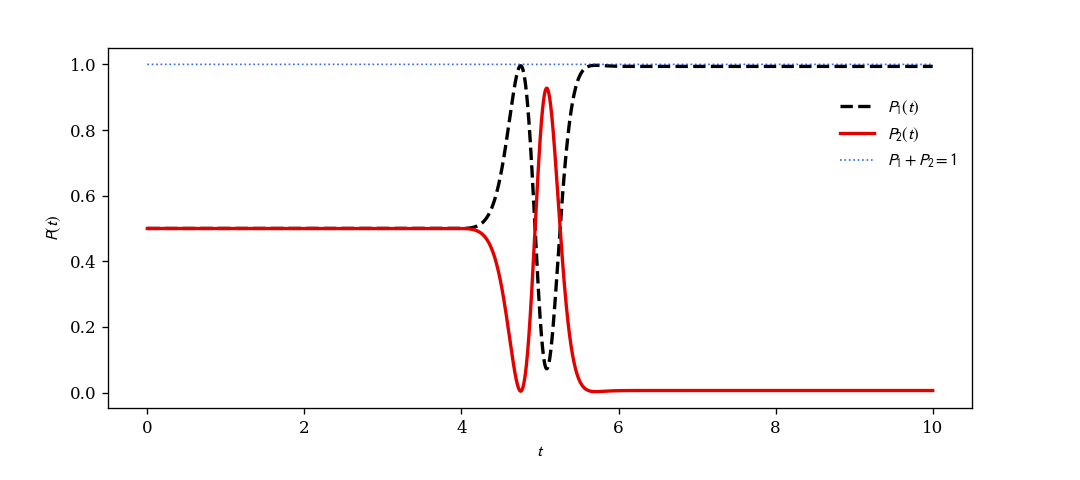

In [6]:
fig=plt.figure(figsize=(9,4))
fig.subplots_adjust(bottom=0.15, left=0.1, top = 0.9, right=0.9,wspace=0.0,hspace=0.2)
fig.suptitle('')



_c=['xkcd:black','xkcd:red','xkcd:blue']
sub = fig.add_subplot(111)

sub.plot(t,P1,c=_c[0],alpha=1,linestyle='--',linewidth=2,label=r'$P_{1}(t)$')
sub.plot(t,P2,c=_c[1],alpha=1,linestyle='-',linewidth=2,label=r'$P_{2}(t)$')


sub.plot(t,P1+P2,c='xkcd:blue',alpha=0.8,linestyle=':',linewidth=1,label=r'$P_{1}+P_{2}=1$')




sub.legend(framealpha=0,ncol=1,loc='upper right',bbox_to_anchor=(1,.9))

sub.set_ylabel('$P(t)$')   
sub.set_xlabel('$t$')   
    





plt.show()

<IPython.core.display.Javascript object>


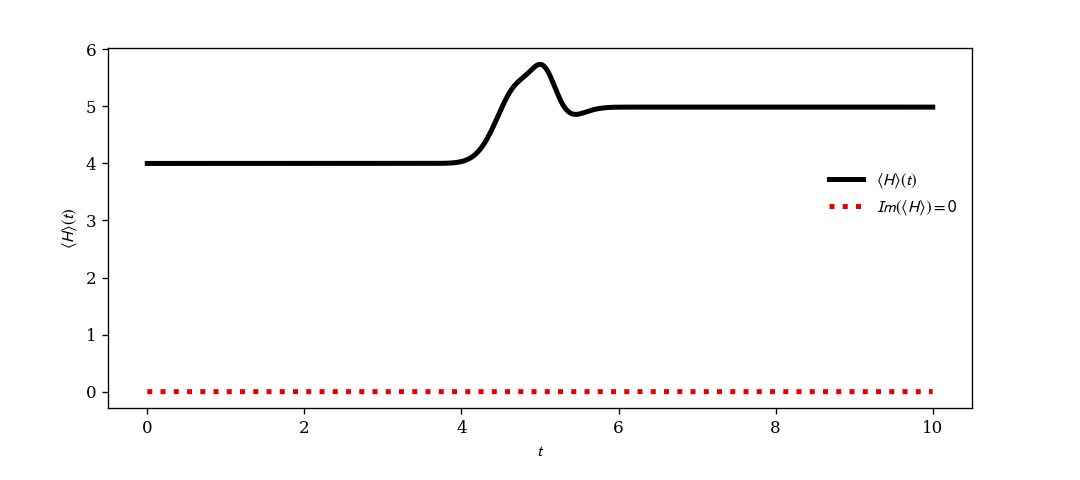

In [7]:
fig=plt.figure(figsize=(9,4))
fig.subplots_adjust(bottom=0.15, left=0.1, top = 0.9, right=0.9,wspace=0.0,hspace=0.2)
fig.suptitle('')



_c=['xkcd:black','xkcd:red','xkcd:blue']
sub = fig.add_subplot(111)

sub.plot(t,Energy,c=_c[0],alpha=1,linestyle='-',linewidth=3,label=r'$\langle H \rangle(t)$')
sub.plot(t,Energy_imag,c=_c[1],alpha=1,linestyle=':',linewidth=3,label=r'$Im(\langle H \rangle)=0$')




sub.legend(framealpha=0,ncol=1,loc='upper right',bbox_to_anchor=(1,.7))

sub.set_ylabel(r'$\langle H \rangle(t)$')   
sub.set_xlabel('$t$')   






plt.show()

<IPython.core.display.Javascript object>


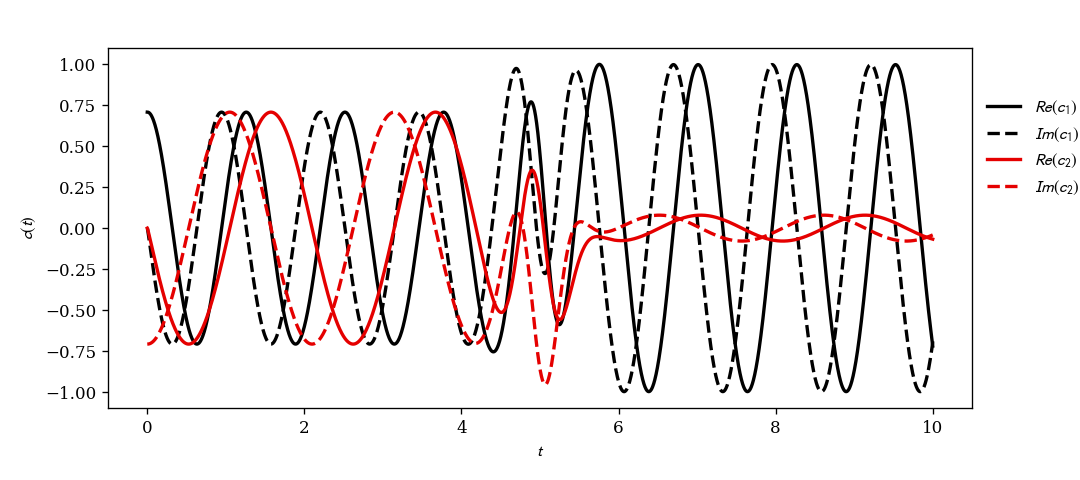

In [8]:
fig=plt.figure(figsize=(9,4))
fig.subplots_adjust(bottom=0.15, left=0.1, top = 0.9, right=0.9,wspace=0.0,hspace=0.2)
fig.suptitle('')



_c=['xkcd:black','xkcd:red','xkcd:blue']
sub = fig.add_subplot(111)

sub.plot(t,c1_re,c=_c[0],alpha=1,linestyle='-',linewidth=2,label=r'$Re(c_{1})$')
sub.plot(t,c1_im,c=_c[0],alpha=1,linestyle='--',linewidth=2,label=r'$Im(c_{1})$')

sub.plot(t,c2_re,c=_c[1],alpha=1,linestyle='-',linewidth=2,label=r'$Re(c_{2})$')
sub.plot(t,c2_im,c=_c[1],alpha=1,linestyle='--',linewidth=2,label=r'$Im(c_{2})$')






sub.legend(framealpha=0,ncol=1,loc='upper left',bbox_to_anchor=(1,.9))

sub.set_ylabel('$c(t)$')       
sub.set_xlabel('$t$')   





plt.show()

/home/dimitronic/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/home/dimitronic/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


<IPython.core.display.Javascript object>


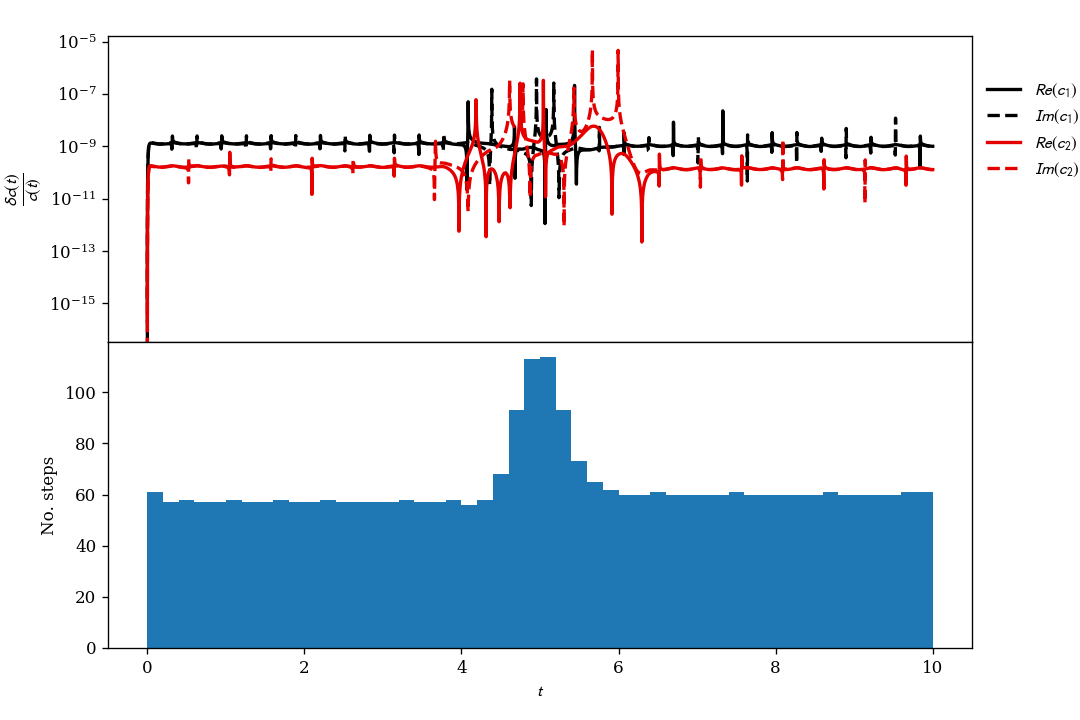

In [9]:
fig=plt.figure(figsize=(9,6))
fig.subplots_adjust(bottom=0.1, left=0.1, top = 0.95, right=0.9,wspace=0.0,hspace=0.0)
fig.suptitle('')



_c=['xkcd:black','xkcd:red','xkcd:blue']
sub = fig.add_subplot(211)

sub.plot(t,np.abs(err1_re/c1_re),c=_c[0],alpha=1,linestyle='-',linewidth=2,label=r'$Re(c_{1})$')
sub.plot(t,np.abs(err1_im/c1_im),c=_c[0],alpha=1,linestyle='--',linewidth=2,label=r'$Im(c_{1})$')

sub.plot(t,np.abs(err2_re/c2_re),c=_c[1],alpha=1,linestyle='-',linewidth=2,label=r'$Re(c_{2})$')
sub.plot(t,np.abs(err2_im/c2_im),c=_c[1],alpha=1,linestyle='--',linewidth=2,label=r'$Im(c_{2})$')






sub.legend(framealpha=0,ncol=1,loc='upper left',bbox_to_anchor=(1,.9))
sub.set_ylabel('$\dfrac{\delta c(t)}{c(t)}$')       
sub.set_yscale('log')
sub.set_xticks([])


sub = fig.add_subplot(212)
sub.hist(t,bins=50)
sub.set_ylabel('No. steps')       
sub.set_xlabel('$t$')   




plt.show()